Final Intercept (theta0): 4.674095684599447
Final Slope (theta1): 2.767771596552523


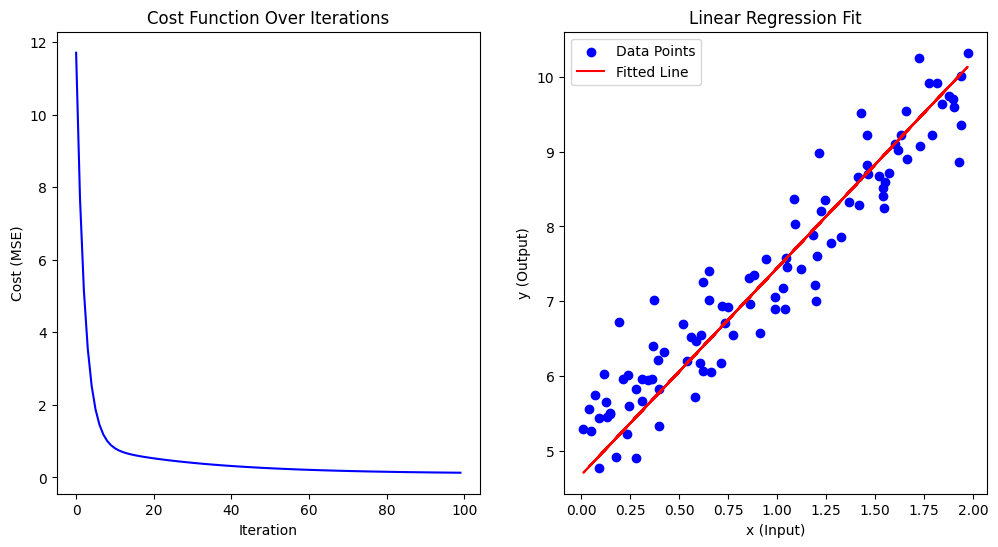

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random points for X between 0 and 2
y = 5 + 2.5 * X + np.random.randn(100, 1) * 0.5  # y = 5 + 2.5 * X + noise

# 2. Set up parameters for gradient descent
learning_rate = 0.1
iterations = 100
m = len(y)  # number of samples
X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 for the intercept term

# Initialize theta values (parameters) for linear regression
theta = np.random.randn(2, 1)  # random initialization

# For tracking progress
theta_history = [theta.copy()]
cost_history = []

# 3. Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# 4. Gradient Descent for Linear Regression
for iteration in range(iterations):
    gradients = (1 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    
    # Store theta and cost for visualization
    theta_history.append(theta.copy())
    cost_history.append(compute_cost(X_b, y, theta))

# Output final values
print("Final Intercept (theta0):", theta[0][0])
print("Final Slope (theta1):", theta[1][0])

# 5. Plotting cost function and theta updates
plt.figure(figsize=(12, 6))

# Plot cost function over iterations
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, 'b-')
plt.title("Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")

# Plot regression line with final theta
plt.subplot(1, 2, 2)
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, X_b.dot(theta), color="red", label="Fitted Line")
plt.xlabel("x (Input)")
plt.ylabel("y (Output)")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()
